In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import glob

# datasets = glob.glob("dataset/*.csv")
# datasets = [x[8:-4] for x in datasets]
# datasets = [x for x in datasets if x != "3D_printer" and x != "Concrete Compressive Strength" and x != "CCPM"]
datasets = ['Bala_classification_dataset',
            'Bala_regression_dataset',
            'BMDS_data',
            'PUE',
            'Crystal_structure',
            'glass',
            'bandgap']
datasets

['Bala_classification_dataset',
 'Bala_regression_dataset',
 'BMDS_data',
 'PUE',
 'Crystal_structure',
 'glass',
 'bandgap']

['#f35f5f', '#7ed9d9', '#9467bd', '#b3de69', '#ffc0d9', '#5fbdff', '#fdbf6f']
Current dataset:  Bala classification dataset
Current dataset:  Bala regression dataset
Current dataset:  BMDS data
Current dataset:  PUE
Current dataset:  Crystal structure
Current dataset:  glass
Current dataset:  bandgap


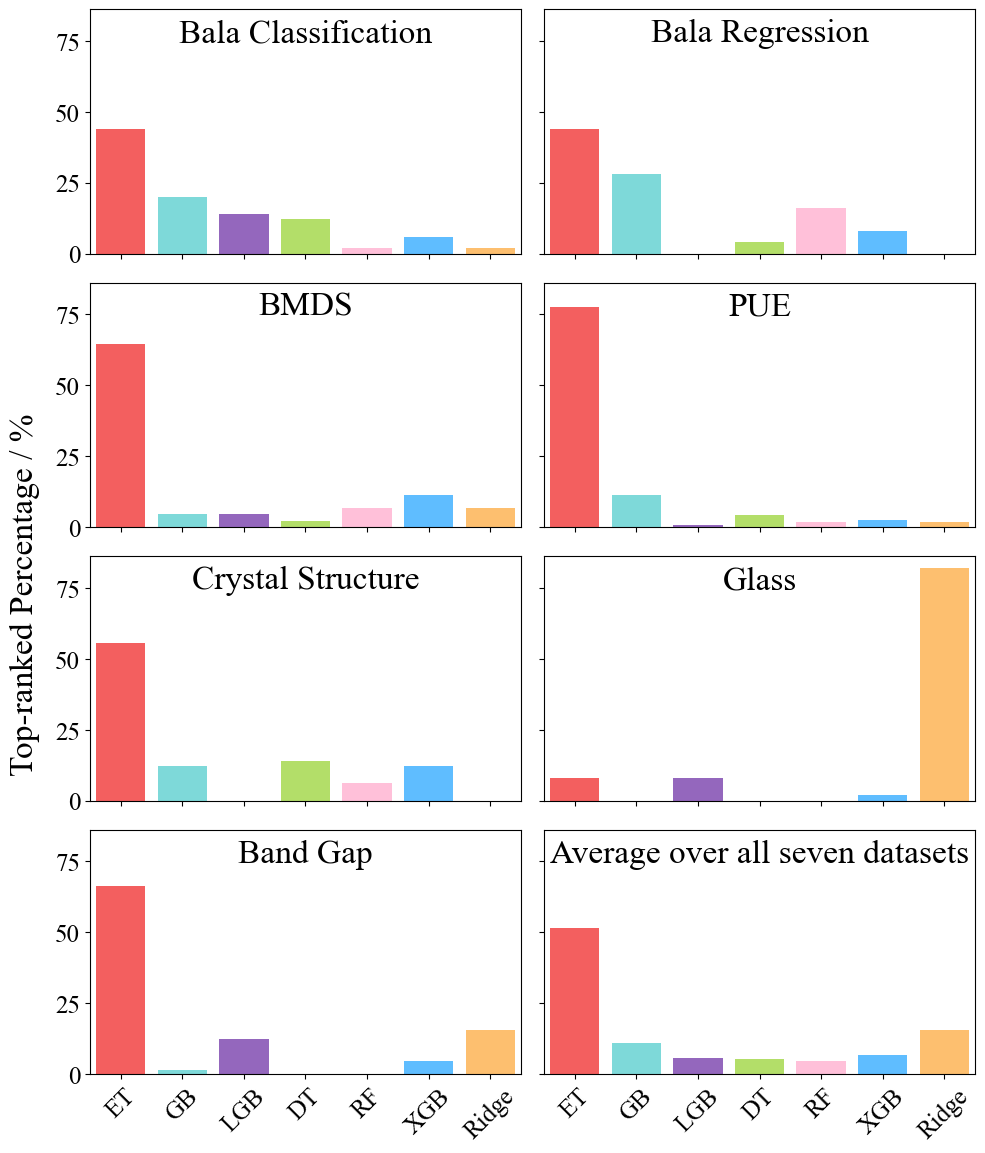

In [3]:
from collections import Counter
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")


# plt.style.use(['nature'])
# set font family as new times roman
plt.rcParams["font.family"] = "Times New Roman"

all_methods = ["et", "gbr", "lgb", "dt", "rf", "xgb", "ridge"]
hats = [".", "/", "x", "o", "O", "*", "+"]
my_palette = sns.color_palette(["#F35F5F", "#7ED9D9", "#9467BD", "#B3DE69", "#FFC0D9", "#5FBDFF", "#FDBF6F"])
# my_palette = sns.palettes.color_palette("husl", n_colors=7)
print(my_palette.as_hex())
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=my_palette)

def plot_best_method(df, ax):
    best_methods = []
    miss_ratios = df["miss_ratio"].unique()
    cols = df["column"].unique()
    for col in cols:
        df_at_col = df[df["column"] == col]
        for miss_ratio in miss_ratios:
            if float(miss_ratio) > 0.5:
                continue
            df_at_miss_rate = df_at_col[df_at_col["miss_ratio"] == miss_ratio]
            df_at_miss_rate = df_at_miss_rate.sort_values(by="RMSE")
            best_method = df_at_miss_rate.iloc[0]["method"].split("_")[-1]
            if best_method == "hyperimpute":
                best_method = "hyper"
            elif best_method == "mice":
                best_method = "miss"
            best_methods.append(best_method)

    sns.countplot(x=best_methods, ax=ax, order=["et", "gbr", "lgb", "dt", "rf", "xgb", "ridge"],
                  palette=my_palette, stat="percent",saturation=1.0)
    ax.set_xticklabels(["ET", "GB", "LGB", "DT", "RF", "XGB", "Ridge"], rotation=45)
    # # 添加纹理
    # for i, p in enumerate(ax.patches):
    #     p.set_hatch(hats[i])

    # del x-tick labels
    data_name = df.iloc[0]["dataset"].replace('_', ' ')
    print("Current dataset: ", data_name)
    if data_name == "Bala classification dataset":
        data_name = "Bala Classification"
    elif data_name == "Bala regression dataset":
        data_name = "Bala Regression"
    elif data_name == "Rajan MXene data":
        data_name = "Rajan MXene"
    elif data_name == "CCPM":
        data_name = "PUE"
    elif data_name == "glass":
        data_name = "Glass"
    elif data_name == "BMDS data":
        data_name = "BMDS"
    elif data_name == "bandgap":
        data_name = "Band Gap"
    elif data_name == "Crystal structure":
        data_name = "Crystal Structure"
    # ax.set_title(data_name, fontsize=24)
    # 把title放到框内
    ax.text(0.5, 0.9, data_name, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
            fontsize=24)
    ax.set_ylabel("")
    # ax.set_xlabel("")
    ax.tick_params(labelsize=18)
    # get the best method ratio
    best_methods_counter = Counter(best_methods)
    return best_methods_counter


def counter2ratio(counter):
    total = sum(counter.values())
    for key in counter:
        counter[key] /= total
    return counter


all_best_methods_ratio = {}

for m in all_methods:
    all_best_methods_ratio[m] = 0

n_cols = 2
n_rows = math.ceil(len(datasets) / n_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 3 * n_rows), sharey=True, sharex=True)
axs = axs.flatten()
for i, d in enumerate(datasets):
    ax = axs[i]
    filled_results = pd.read_csv(f"dataset/filled_results/{d}.csv")
    best_method_counter = plot_best_method(filled_results, ax)
    best_method_ratio = counter2ratio(best_method_counter)
    for m in all_methods:
        all_best_methods_ratio[m] += best_method_ratio[m]

for m in all_methods:
    all_best_methods_ratio[m] /= len(datasets)
    all_best_methods_ratio[m] *= 100

fig.tight_layout()
# delete empty plots
for i in range(len(datasets) + 1, len(axs)):
    fig.delaxes(axs[i])

fig.text(0.02, 0.5, 'Top-ranked Percentage / %', va='center', rotation='vertical', fontsize=24)
fig.subplots_adjust(left=0.1, bottom=0.1)
ax = axs[len(datasets)]
sns.barplot(x=list(all_best_methods_ratio.keys()), y=list(all_best_methods_ratio.values()), palette=my_palette, ax=ax, saturation=1.0)

ax.set_xticklabels(["ET", "GB", "LGB", "DT", "RF", "XGB", "Ridge"], rotation=45)
ax.text(0.5, 0.9, "Average over all seven datasets", horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes,
        fontsize=24)

ax.tick_params(labelsize=18)

plt.savefig("results/best_method.png", dpi=300)

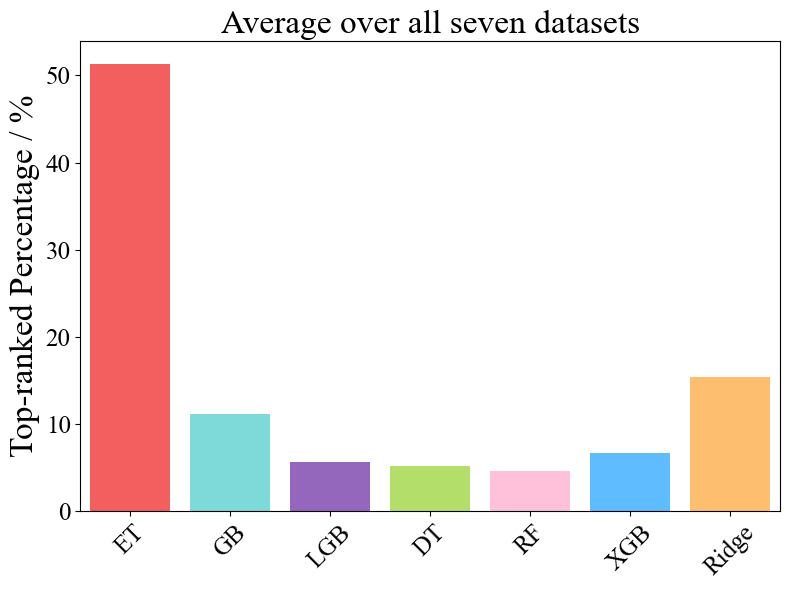

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=list(all_best_methods_ratio.keys()), y=list(all_best_methods_ratio.values()), palette=my_palette, ax=ax, saturation=1.0)
ax.set_xticklabels(["ET", "GB", "LGB", "DT", "RF", "XGB", "Ridge"], rotation=45)
ax.tick_params(labelsize=18)
ax.set_ylabel("Top-ranked Percentage / %", fontsize=24)
ax.set_title("Average over all seven datasets", fontsize=24)
plt.tight_layout()
plt.savefig("results/best_method_avg.png", dpi=300)

In [5]:
df = pd.read_csv("dataset/filled_results/3D_printer.csv")
df

,dataset,column,miss_ratio,method,RMSE,Wasserstein,time
0,3D_printer,Elongation,0.9,fill_with_et,0.866247,0.508305,0.065577
1,3D_printer,Elongation,0.9,fill_with_ridge,0.918469,0.364052,0.005955
2,3D_printer,Elongation,0.9,fill_with_xgb,0.735637,0.535778,0.024010
3,3D_printer,Elongation,0.9,fill_with_lgb,0.794847,0.671792,0.014966
4,3D_printer,Elongation,0.9,fill_with_gbr,0.757736,0.496419,0.028036
...,...,...,...,...,...,...,...
625,3D_printer,layer_height,0.1,fill_with_xgb,0.035603,0.018734,0.040962
626,3D_printer,layer_height,0.1,fill_with_lgb,0.042093,0.027900,0.102055
627,3D_printer,layer_height,0.1,fill_with_gbr,0.026617,0.016239,0.033000
628,3D_printer,layer_height,0.1,fill_with_rf,0.032243,0.020171,0.064997


In [6]:
from scipy.stats import wasserstein_distance

result = "Missing Ratio,Skewness, Kurtosis\n"
df_original = pd.read_csv("dataset/CCPM.csv")
col_name = "Tr1"
print(df_original[col_name].values)
result += "0, {:.4f}, {:.4f}, {:.4f}\n".format(df_original[col_name].skew(), df_original[col_name].kurtosis(),
                                               wasserstein_distance(df_original[col_name].values,
                                                                    df_original[col_name].values))
for i in range(1, 10):
    # if i == 3:
    #     df = pd.read_csv("dataset/miss_datasets/Rajan_MXene_data/EC(eV)_0.30000000000000004.csv")
    # elif i == 6 or i == 7:
    #     df = pd.read_csv("dataset/miss_datasets/Rajan_MXene_data/EC(eV)_0.{}000000000000001.csv".format(i))
    # else:
    #     df = pd.read_csv("dataset/miss_datasets/Rajan_MXene_data/EC(eV)_{}.csv".format(i / 10))

    if i == 3:
        df = pd.read_csv("dataset/miss_datasets/CCPM/{}_{}.csv".format(col_name, 0.30000000000000004))
    elif i == 6 or i == 7:
        df = pd.read_csv("dataset/miss_datasets/CCPM/{}_0.{}000000000000001.csv".format(col_name, i))
    else:
        df = pd.read_csv("dataset/miss_datasets/CCPM/{}_{}.csv".format(col_name, i / 10))
    dis = wasserstein_distance(df_original[col_name].values, df[col_name].dropna().values)
    skewness = df[col_name].skew()
    kurtosis = df[col_name].kurtosis()
    result += "{},{:.4f},{:.4f}, {:.4f}\n".format(i / 10, skewness, kurtosis, dis)
print(result)


[ 45.  45.  90.  90. 100. 100.  25.  25.  25.  25.  25.  25.  25.  25.
  25.  25.  25.  25.  25.  25. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120.  60.  60.  80.  80.  80.  80.  80.  25.  25.  25.
  25.  25.  25.  25.  25.  80.  80.  80.  80.  70.  45.  90.  90.  90.
  90.  90.  90.  90.  22.  22.  22.  22.  22.  22.  22.  22.  22.  22.
  22.  22.  22.  22.  22.  22.  22.  22.  22.  22.  22.   0.  22.  65.
  65.  65.  50. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110. 110.
 110. 110. 100. 100. 100. 100. 100. 100. 100. 100. 100. 110. 110. 110.
  90.  90.  90.  90.  90. 110. 110. 110. 110. 110. 110. 110.  85.  85.
  85.  85.  85.  85.  85.  85.  85.  85.  85.  85.  85.  85.  85.  85.
  85.  85.  85.  85.  85.  85.  50.  50.  80.  80.  80.  80.  80.  80.
  85.  75.  60.  60.  80.  80.  90.  80.  80.  80.  80.  80.  65.  65.
  65.  65.  65.  65.  65.  65. 120. 120. 120. 120. 120. 120. 110. 110.
 110. 

In [7]:
# save the result to a csv file
with open("{}_stats.csv".format(col_name), "w") as f:
    f.write(result)

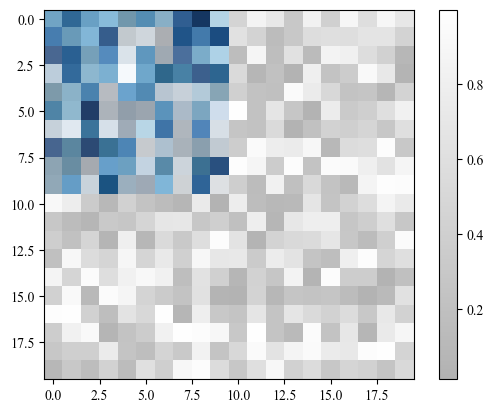

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个带有纹理的随机数组
np.random.seed(0)
data = np.random.rand(10, 10)

# 创建一个纹理数组
texture = np.random.rand(20, 20)

# 绘制数据
plt.imshow(data, cmap='Blues', interpolation='nearest')

# 将纹理覆盖在数据上
plt.imshow(texture, cmap='gray', alpha=0.3)

plt.colorbar()
plt.show()


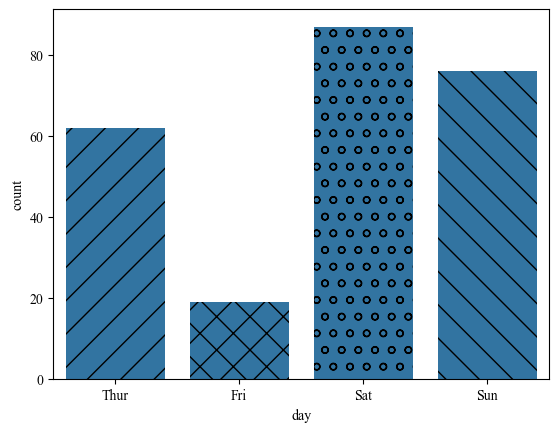

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用Seaborn内置的数据集
tips = sns.load_dataset("tips")

# 使用countplot创建柱状图
sns.countplot(x="day", data=tips)

# 添加纹理
plt.gca().patches[0].set_hatch('/')  # 对第一个柱形添加纹理
plt.gca().patches[1].set_hatch('x')  # 对第二个柱形添加纹理
plt.gca().patches[2].set_hatch('o')  # 对第三个柱形添加纹理
plt.gca().patches[3].set_hatch('\\')  # 对第四个柱形添加纹理

plt.show()


In [10]:
import pandas as pd

Crystal_structure = pd.read_csv('dataset/Crystal_structure.csv')
Crystal_structure

,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,AgBiO3,Ag,Bi,False,rhombohedral,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-5.296571,0.877336,4.072914,0.542857
1,AgMoO3,Ag,Mo,False,cubic,1,5,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-5.083429,0.942809,4.126280,0.435714
2,AgNbO3,Ag,Nb,True,rhombohedral,1,5,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-5.366857,0.928944,4.072890,0.457143
3,AgReO3,Ag,Re,False,cubic,1,5,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-5.163714,0.957094,4.201732,0.414286
4,AgSbO3,Ag,Sb,True,orthorhombic,1,5,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-5.121429,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,YbTiO3,Yb,Ti,True,orthorhombic,2,4,1.14,0.95,0.61,1.10,1.54,2.519261,1.927849,-5.534429,0.893558,4.272306,0.435714
671,YbVO3,Yb,V,True,orthorhombic,2,4,1.14,0.95,0.58,1.10,1.63,2.519261,1.758039,-5.456429,0.907097,4.231037,0.414286
672,YbWO3,Yb,W,False,orthorhombic,2,4,1.14,0.95,0.66,1.10,2.36,2.519261,1.745600,-5.215714,0.871870,4.441924,0.471429
673,YbZrO3,Yb,Zr,False,orthorhombic,2,4,1.14,0.95,0.72,1.10,1.33,2.519261,2.043778,-5.791714,0.847194,4.835508,0.514286
